In [1]:
# ROBERT HEETER
# ELEC 378 Machine Learning
# 29 April 2023

# PROJECT V4


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

import librosa


In [97]:
directory = os.path.join(os.getcwd(),'elec-378-sp2023-speech-emotion-classification/data/data/')
data = np.empty((1125, 2), dtype=object)

emotion_to_id = {
    "angry" : 0,
    "calm" : 1,
    "disgust" : 2,
    "fearful" : 3,
    "happy" : 4,
    "neutral" : 5,
    "sad" : 6,
    "surprised" : 7
}

i = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    if os.path.isfile(f):
        emotion = filename[:len(filename)-7]
        data[i][0] = "/"+filename
        data[i][1] = int(emotion_to_id[emotion])
        i += 1

def make_mfcc(file, n_mfcc):
    sig, sr = librosa.load(file)
    sig_mfcc = librosa.feature.mfcc(y=sig, sr=sr, n_mfcc=n_mfcc, S=None, htk=True)
    sig_mfcc_avg = np.mean(sig_mfcc, axis=1)
    
    return sig_mfcc_avg

n_mfcc = 34
n_mfcc = 40

X = np.empty((len(data), n_mfcc), dtype=float)
y = np.empty((len(data)), dtype=int)

for i in range(len(data)):
    file = directory + data[i][0]
    X[i] = make_mfcc(file, n_mfcc=n_mfcc)
    y[i] = data[i][1]

print(X, y)


[[-7.11837280e+02  6.46761398e+01  4.56567478e+00 ...  3.67054653e+00
   1.74070251e+00  3.90848660e+00]
 [-6.03193481e+02  1.73712940e+01 -1.56018944e+01 ...  2.47283936e+00
  -8.46360981e-01 -4.47844148e-01]
 [-5.35610046e+02  6.28307800e+01 -1.34983034e+01 ...  6.73127174e+00
   4.39640522e+00  2.56857562e+00]
 ...
 [-5.59642151e+02  5.42044601e+01  1.07576733e+01 ...  2.66460228e+00
  -4.21445042e-01  1.79412746e+00]
 [-5.85458801e+02  4.27496529e+01 -1.96429024e+01 ... -3.33718471e-02
  -1.97226238e+00 -2.54910767e-01]
 [-4.28510468e+02  5.41152802e+01 -1.27884512e+01 ...  1.75566900e+00
   1.26846135e+00  3.85259938e+00]] [1 6 6 ... 2 0 6]


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# **Support Vector Machine (SVM)**

In [99]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = make_pipeline(RobustScaler(), SVC(C=15, tol=0.001))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"{accuracy*100}%")


81.41592920353983%


In [105]:
from sklearn.neural_network import MLPClassifier

mlp_params = {'activation': 'relu', 
              'solver': 'lbfgs', 
              'hidden_layer_sizes': 1283, 
              'alpha': 0.3849485717707319, 
              'batch_size': 163, 
              'learning_rate': 'constant',
              'max_iter':1000}

clf = make_pipeline(RobustScaler(), MLPClassifier(**mlp_params))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"{accuracy*100}%")



44.24778761061947%


/Users/rch/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# **Convolutional Neural Network (CNN)**

In [85]:
import tensorflow as tf
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

model = Sequential()

# model2.add(layers.Conv2D(64, (4, 4), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# model2.add(layers.MaxPooling2D((2, 2)))# Hidden Layer 2
# model2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
# model2.add(layers.MaxPooling2D((2,2)))

# model3.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(96, 96, 3)))

# random.seed(123) # Establish Consistency in resultsmodel4 = Sequential() # Instantiate the 4th Modelmodel4.add(layers.Conv2D(32, (3, 3), activation=’relu’, input_shape=(96, 96, 3)))
# model4.add(layers.MaxPooling2D((2, 2)))
# model4.add(Dropout(0.4))
# model4.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))
# model4.add(Dropout(0.4)) # Flattening- Convert 2D matrix to a 1D vector
# model4.add(layers.Flatten())
# model4.add(layers.Dense(512, activation = 'relu'))
# model4.add(Dropout(0.2))
# model4.add(layers.Dense(1, activation='sigmoid'))

# model5.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=unit_norm(), input_shape=(96, 96, 3)))


# model.add(Conv1D(128, 16, padding='same', input_shape=(40,1)))
# model.add(Activation('relu'))

# model.add(Conv1D(128, 16, padding='same', input_shape=(40,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(0.4))

# model.add(MaxPooling1D(pool_size=8))

# model.add(Conv1D(128, 16, padding='same', input_shape=(40,1)))
# model.add(Activation('relu'))

# model.add(Conv1D(128, 16, padding='same', input_shape=(40,1)))
# model.add(Activation('relu'))

# model.add(Conv1D(128, 16, padding='same', input_shape=(40,1)))
# model.add(Activation('relu'))

# # model.add(Conv1D(128, 16, padding='same', input_shape=(40,1)))
# # model.add(BatchNormalization())
# # model.add(Activation('relu'))

# # model.add(MaxPooling1D(pool_size=5))

# # model.add(Conv1D(128, 5, padding='same', input_shape=(40,1)))
# # model.add(Activation('relu'))

# # model.add(Conv1D(128, 5, padding='same', input_shape=(40,1)))
# # model.add(Activation('relu'))

# # model.add(Dropout(0.2))
# model.add(Flatten())
# # model.add(Dense(10, kernel_regularizer='l2', bias_regularizer='l2'))
# model.add(Dense(8))
# # model.add(Activation('softmax'))

# opt = keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=None, decay=0.0)


model.add(Conv1D(128, 5, padding='same', input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.0005, rho=0.9, epsilon=None, decay=0.0)




# model.add(Conv1D(128, 5,padding='same', input_shape=(34,1)))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(MaxPooling1D(pool_size=(8)))
# model.add(Conv1D(128, 5,padding='same',))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(Flatten())
# model.add(Dense(10))
# model.add(Activation('softmax'))
# opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [86]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [87]:
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# print(X_train_cnn.shape)
# print(X_test_cnn.shape)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)

cnnhistory = model.fit(X_train_cnn, y_train, batch_size=4, epochs=60, validation_data=(X_test_cnn, y_test))


Epoch 1/60
253/253 [==============================] - 1s 3ms/step - loss: 7.9245 - accuracy: 0.1532 - val_loss: 2.7653 - val_accuracy: 0.1062
Epoch 2/60
253/253 [==============================] - 1s 2ms/step - loss: 2.4400 - accuracy: 0.2036 - val_loss: 2.0158 - val_accuracy: 0.2035
Epoch 3/60
253/253 [==============================] - 1s 2ms/step - loss: 2.0346 - accuracy: 0.2283 - val_loss: 1.7916 - val_accuracy: 0.2832
Epoch 4/60
253/253 [==============================] - 1s 2ms/step - loss: 1.9469 - accuracy: 0.2540 - val_loss: 1.8272 - val_accuracy: 0.3097
Epoch 5/60
253/253 [==============================] - 1s 2ms/step - loss: 1.8945 - accuracy: 0.2628 - val_loss: 1.9866 - val_accuracy: 0.2035
Epoch 6/60
253/253 [==============================] - 1s 2ms/step - loss: 1.8515 - accuracy: 0.2866 - val_loss: 1.7761 - val_accuracy: 0.3009
Epoch 7/60
253/253 [==============================] - 1s 2ms/step - loss: 1.8084 - accuracy: 0.3162 - val_loss: 1.7480 - val_accuracy: 0.2655
Epoch 

253/253 [==============================] - 1s 2ms/step - loss: 1.2269 - accuracy: 0.5435 - val_loss: 1.5176 - val_accuracy: 0.4956
Epoch 59/60
253/253 [==============================] - 1s 2ms/step - loss: 1.1879 - accuracy: 0.5672 - val_loss: 1.4979 - val_accuracy: 0.4425
Epoch 60/60
253/253 [==============================] - 1s 2ms/step - loss: 1.1978 - accuracy: 0.5623 - val_loss: 1.5545 - val_accuracy: 0.4336


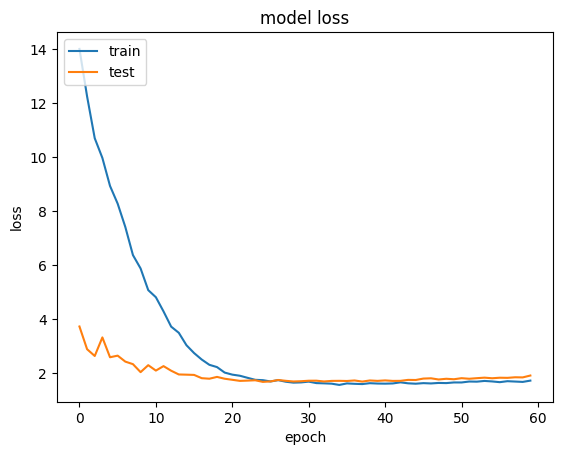

In [60]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

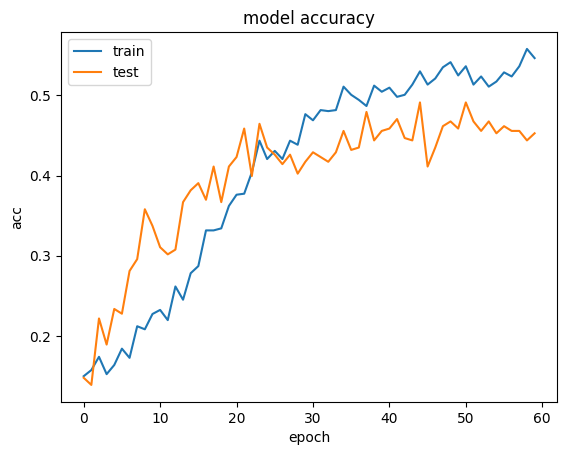

In [61]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"{accuracy*100}%")

y_pred = model.predict(X_test_cnn)
print(np.shape(y_pred))
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy*100}%")

In [ ]:

opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.8, epsilon=None, decay=0.0)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [ ]:
cnnhistory = model.fit(X_train_cnn, y_train, batch_size=16, epochs=1000)



In [ ]:
y_pred = model.predict(X_test_cnn)

loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"{accuracy*100}%")
print(f"{loss}")


print(np.shape(y_pred))
#y_pred = y_pred[:,0:8]
print(np.shape(y_pred))
y_pred = np.argmax(y_pred,1)


print(y_pred)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression

clf = make_pipeline(RobustScaler(), LogisticRegression(tol=0.00001, max_iter=10000))
clf.fit(X_train, y_train)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier

clf = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors = 8))
clf.fit(X_train, y_train)